In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [3]:
%cd /home/stepan/kaggle/cars_from_auction

/home/stepan/kaggle/cars_from_auction


In [4]:
%ls

data/  prepare/  review/  train/


In [5]:
%ls data/

processed/  sample_submission.csv  test_no_target.csv  train.csv  zipcodes.csv


In [6]:
data_path = 'data/processed/'
data_file = 'merged_filled_transformed_train.csv'

In [7]:
data = pd.read_csv(data_path + data_file, index_col=0)

In [8]:
data

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price,city,latitude,longitude
0,2.000000,bus,2006,auto,140.00000,c4,150000,gasoline,citroen,0.0,49191,5.940171,8.358666,Belm,52.30476,8.12846
1,1.780292,limousine,2016,manual,121.10506,vito,150000,gasoline,mercedes_benz,0.0,45896,5.438079,7.806696,Gelsenkirchen,51.51750,7.08575
2,2.200000,limousine,2010,manual,175.00000,mondeo,125000,diesel,ford,0.0,59229,6.835185,9.247058,"Ahlen, Westfalen",51.75972,7.89694
3,2.768020,limousine,2000,auto,265.00000,andere,150000,gasoline,ford,0.0,39365,6.522093,8.867568,"Marienborn, Börde",52.19628,11.10652
4,1.697200,convertible,2003,manual,109.00000,2_reihe,150000,gasoline,peugeot,0.0,55271,5.438079,7.768533,Stadecken-Elsheim,49.91220,8.12528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.400000,limousine,2006,manual,75.00000,golf,90000,gasoline,volkswagen,0.0,35745,6.214608,8.452335,"Herborn, Hessen",50.68330,8.31667
49996,1.300000,small car,2004,manual,60.00000,fiesta,150000,gasoline,ford,0.0,60386,5.438079,6.761573,Frankfurt am Main,50.11670,8.68333
49997,1.978633,limousine,1996,manual,150.00000,5er,150000,gasoline,bmw,0.0,28309,4.867534,7.729735,Bremen,53.07516,8.80777
49998,1.786435,limousine,2007,manual,122.00000,1er,100000,diesel,bmw,0.0,83623,6.214608,9.005037,Dietramszell,47.85000,11.60000


In [9]:
data.describe()

,engine_capacity,registration_year,power,mileage,damage,zipcode,insurance_price,price,latitude,longitude
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49946.000000,49946.000000
mean,1.810852,2003.777200,125.557183,125206.200000,0.080260,51436.403920,5.466416,8.084422,50.859191,9.440166
std,0.452722,7.269804,58.404643,39587.836838,0.271698,25808.985658,0.972455,1.068681,1.707969,2.063296
min,0.100000,1945.000000,1.000000,5000.000000,0.000000,1067.000000,2.302585,6.120297,47.410100,5.916670
25%,1.463816,2000.000000,82.000000,100000.000000,0.000000,30989.000000,4.787492,7.218910,49.450000,7.750000
50%,1.780292,2004.000000,118.000000,150000.000000,0.000000,50374.000000,5.438079,8.066208,50.983300,9.050000
75%,2.000000,2008.000000,150.000000,150000.000000,0.000000,72415.000000,6.086775,8.891512,52.193930,10.883300
max,4.381114,2016.000000,500.000000,150000.000000,1.000000,99998.000000,10.570291,12.006401,54.862188,14.970560


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_capacity    50000 non-null  float64
 1   type               50000 non-null  object 
 2   registration_year  50000 non-null  int64  
 3   gearbox            50000 non-null  object 
 4   power              50000 non-null  float64
 5   model              50000 non-null  object 
 6   mileage            50000 non-null  int64  
 7   fuel               50000 non-null  object 
 8   brand              50000 non-null  object 
 9   damage             50000 non-null  float64
 10  zipcode            50000 non-null  int64  
 11  insurance_price    50000 non-null  float64
 12  price              50000 non-null  float64
 13  city               49946 non-null  object 
 14  latitude           49946 non-null  float64
 15  longitude          49946 non-null  float64
dtypes: float64(7), int64(3

# Visualize

In [11]:
default_figsize = (16, 12)
plt.rcParams.update({'font.size': 18})

<AxesSubplot:>

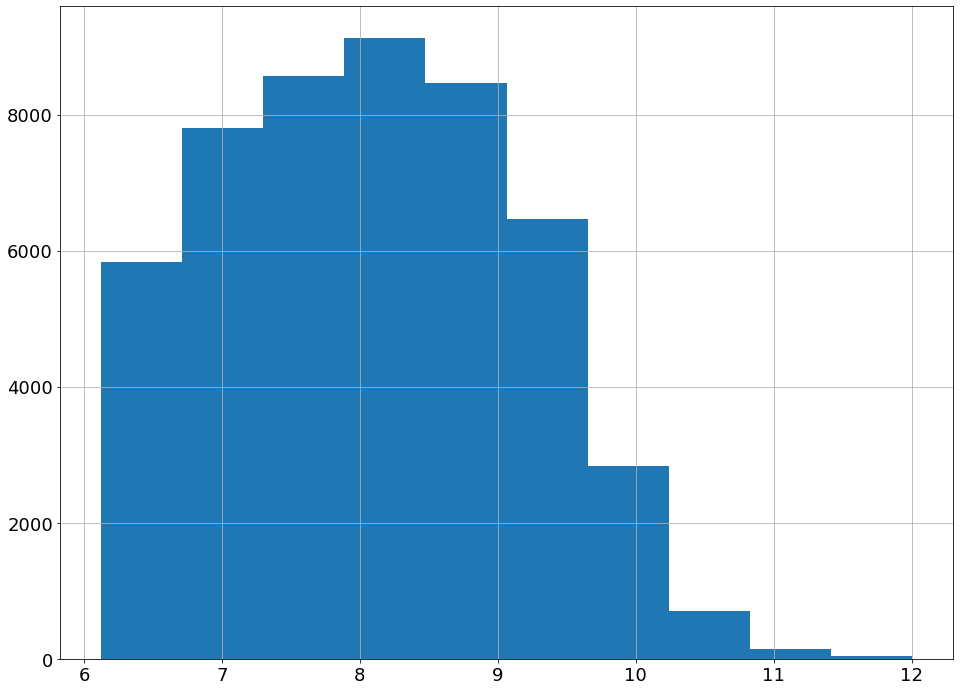

In [13]:
data['price'].hist(figsize=default_figsize)

<AxesSubplot:>

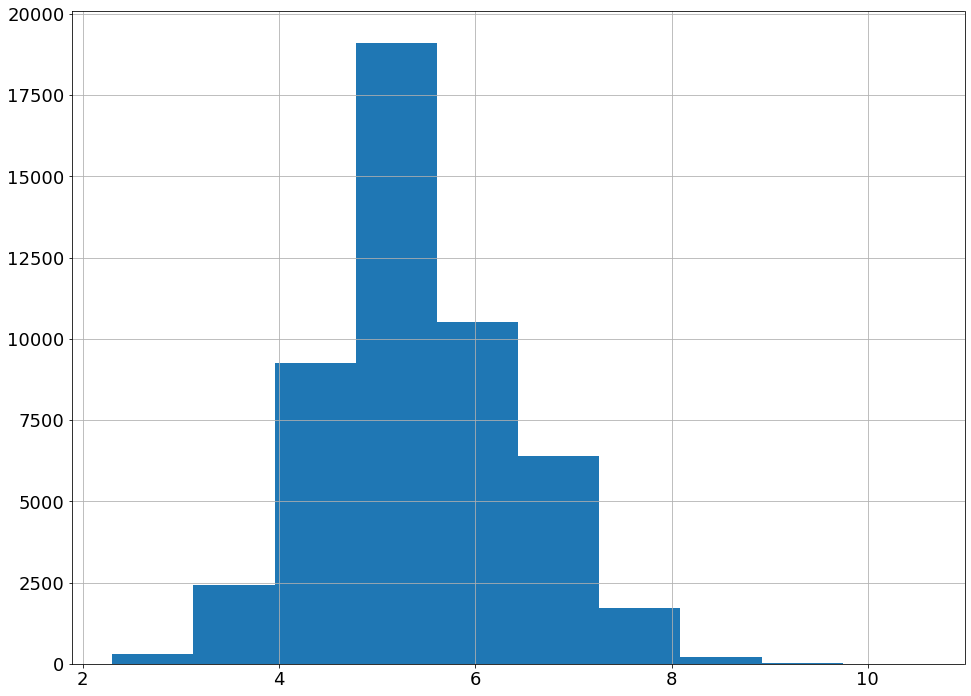

In [12]:
data['insurance_price'].hist(figsize=default_figsize)

<AxesSubplot:>

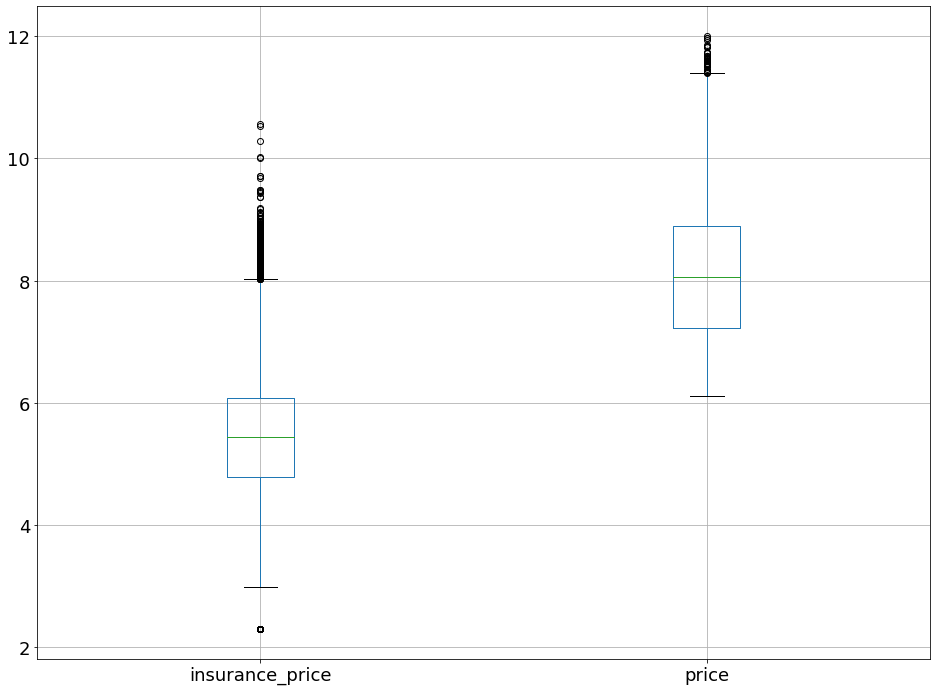

In [14]:
data.boxplot(figsize=default_figsize, column=['insurance_price', 'price'])

<AxesSubplot:>

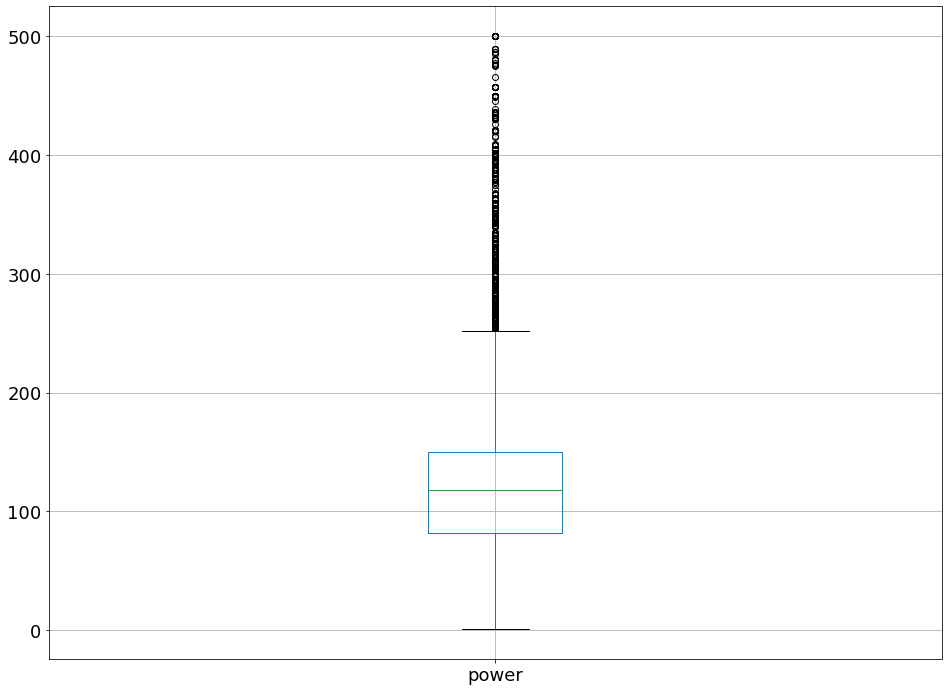

In [15]:
data.boxplot(figsize=default_figsize, column=['power'])

<AxesSubplot:>

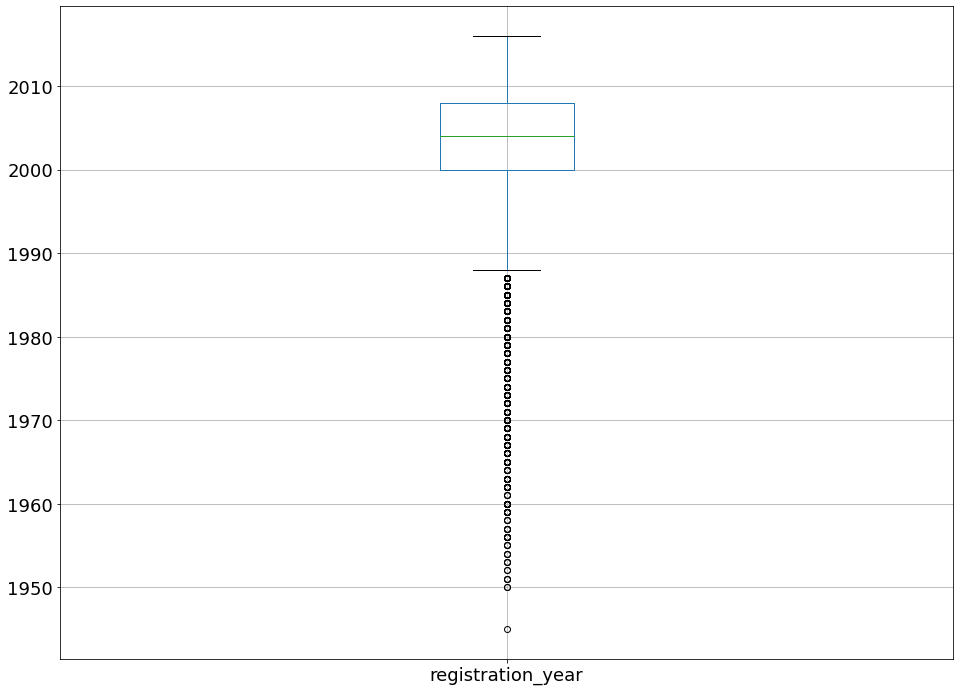

In [16]:
data.boxplot(figsize=default_figsize, column=['registration_year'])

<AxesSubplot:>

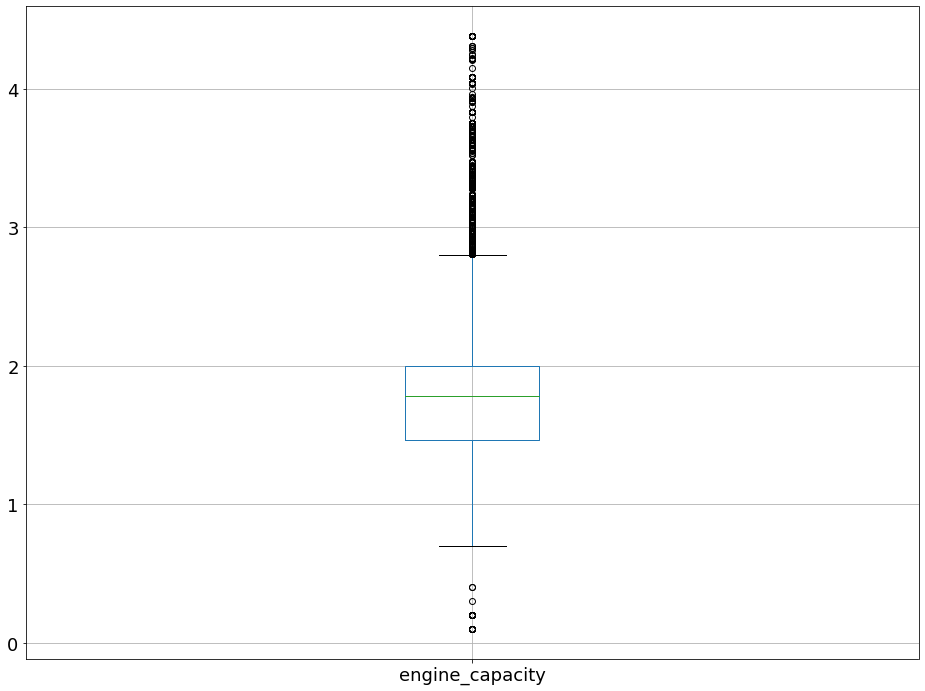

In [17]:
data.boxplot(figsize=default_figsize, column=['engine_capacity'])

<AxesSubplot:ylabel='damage'>

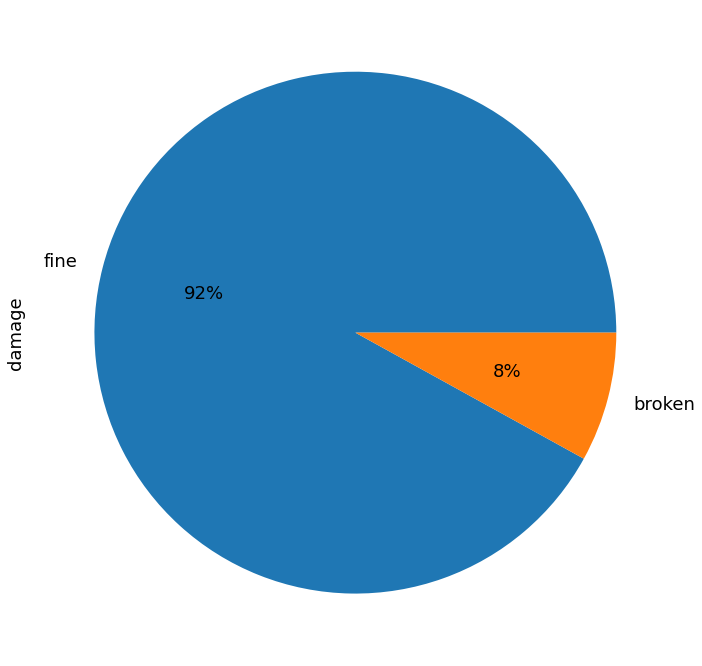

In [18]:
data['damage'].value_counts().plot.pie(figsize=default_figsize, labels=['fine', 'broken'], autopct='%1.0f%%')

<AxesSubplot:ylabel='gearbox'>

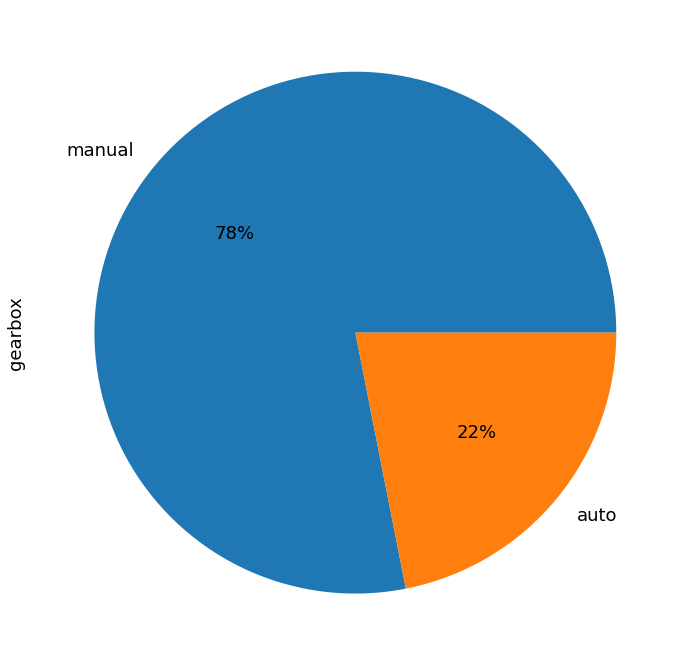

In [19]:
data['gearbox'].value_counts().plot.pie(figsize=default_figsize, autopct='%1.0f%%')

<AxesSubplot:ylabel='type'>

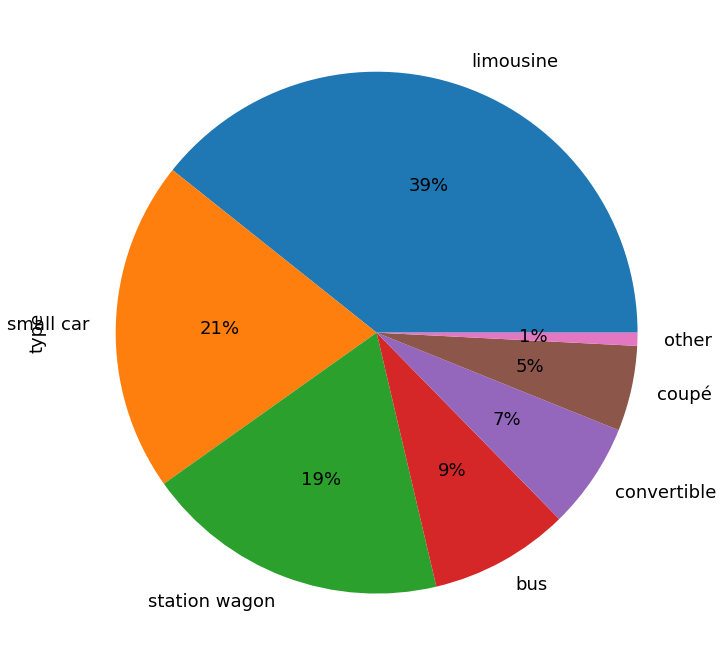

In [20]:
data['type'].value_counts().plot.pie(figsize=default_figsize, autopct='%1.0f%%')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'citroen'),
  Text(1, 0, 'mercedes_benz'),
  Text(2, 0, 'ford'),
  Text(3, 0, 'peugeot'),
  Text(4, 0, 'audi'),
  Text(5, 0, 'renault'),
  Text(6, 0, 'volkswagen'),
  Text(7, 0, 'nissan'),
  Text(8, 0, 'opel'),
  Text(9, 0, 'seat'),
  Text(10, 0, 'bmw'),
  Text(11, 0, 'suzuki'),
  Text(12, 0, 'skoda'),
  Text(13, 0, 'fiat'),
  Text(14, 0, 'mitsubishi'),
  Text(15, 0, 'kia'),
  Text(16, 0, 'sonstige_autos'),
  Text(17, 0, 'mazda'),
  Text(18, 0, 'porsche'),
  Text(19, 0, 'mini'),
  Text(20, 0, 'smart'),
  Text(21, 0, 'toyota'),
  Text(22, 0, 'jeep'),
  Text(23, 0, 'hyundai'),
  Text(24, 0, 'daewoo'),
  Text(25, 0, 'honda'),
  Text(26, 0, 'alfa_romeo'),
  Text(27, 0, 'saab'),
  Text(28, 0, 'volvo'),
  Text(29, 0, 'chevrolet'),
  Text(30, 0, 'chrysler'),
  Text(31, 0, 'daihatsu'),
  Text(32, 0

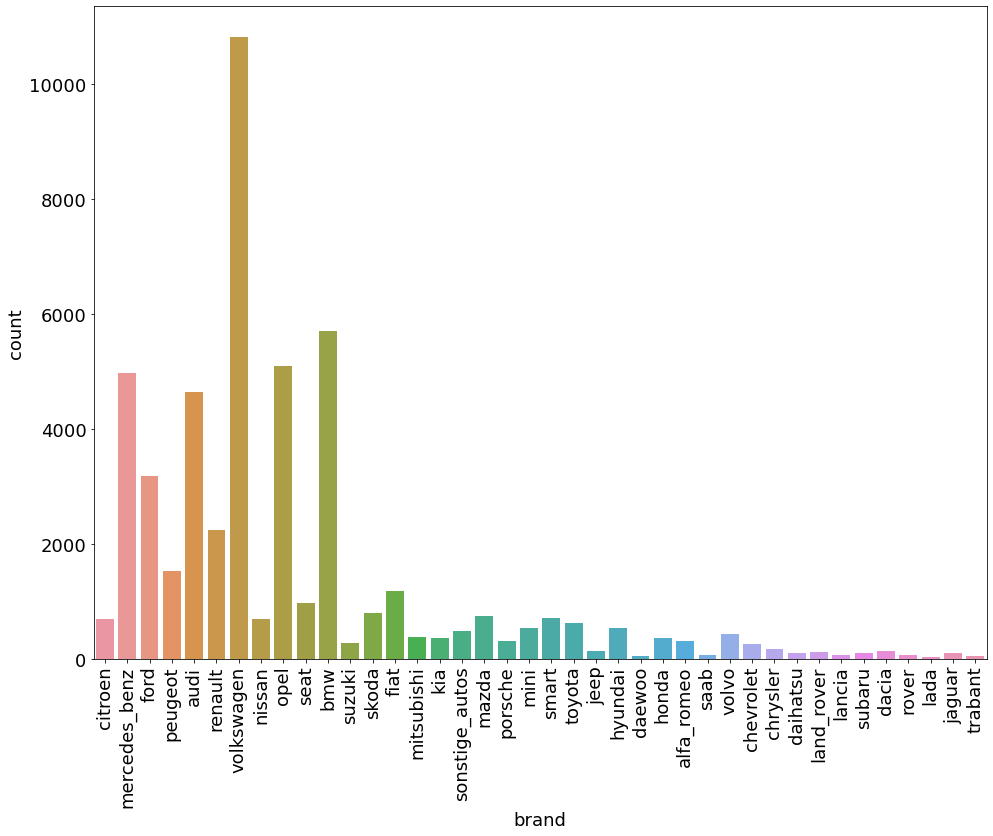

In [21]:
plt.figure(figsize=default_figsize)
sns.countplot(data['brand'])
plt.xticks(rotation=90)

## Statistics

In [22]:
def is_high(row):
    clone = row.copy()
    clone[row.abs() > 0.3] = '#ff937d'
    clone[row.abs() > 0.5] = '#f56942'
    clone[row.abs() > 0.6] = '#ff795e'
    clone[(row.abs() <= 0.3) | (row.abs() == 1.0)] = ''
    return [f'background-color: {cell}' for cell in clone]

In [23]:
data.corr().style.apply(is_high)

,engine_capacity,registration_year,power,mileage,damage,zipcode,insurance_price,price,latitude,longitude
engine_capacity,1.000000,0.102084,0.885540,0.079486,-0.016357,0.046927,0.398397,0.447384,-0.057052,0.020431
registration_year,0.102084,1.000000,0.172203,-0.260366,-0.064905,0.016212,0.305689,0.419561,-0.013831,-0.006545
power,0.885540,0.172203,1.000000,-0.009279,-0.031176,0.065028,0.483700,0.547555,-0.075444,0.020966
mileage,0.079486,-0.260366,-0.009279,1.000000,0.070293,-0.037736,-0.357852,-0.425519,0.049094,-0.027483
damage,-0.016357,-0.064905,-0.031176,0.070293,1.000000,0.000915,-0.062862,-0.203579,-0.007125,-0.002542
zipcode,0.046927,0.016212,0.065028,-0.037736,0.000915,1.000000,0.066942,0.078407,-0.813180,-0.144688
insurance_price,0.398397,0.305689,0.483700,-0.357852,-0.062862,0.066942,1.000000,0.824209,-0.072244,0.019331
price,0.447384,0.419561,0.547555,-0.425519,-0.203579,0.078407,0.824209,1.000000,-0.083984,0.019455
latitude,-0.057052,-0.013831,-0.075444,0.049094,-0.007125,-0.813180,-0.072244,-0.083984,1.000000,0.007248
longitude,0.020431,-0.006545,0.020966,-0.027483,-0.002542,-0.144688,0.019331,0.019455,0.007248,1.000000


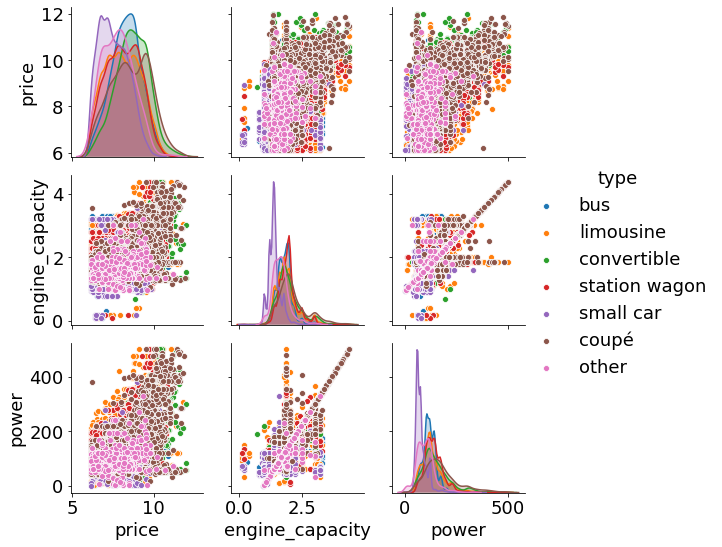

In [32]:
sns.pairplot(data[['price', 'engine_capacity', 'power', 'type']], hue='type')